In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# The Curse of Dimensionality

In [18]:
X, y = make_classification(10) # X is matrix, y is vector

In [19]:
X.shape, y.shape

((10, 20), (10,))

In [13]:
n_vals = np.logspace(1, 4, 20)

In [14]:
n_vals

array([    10.        ,     14.38449888,     20.69138081,     29.76351442,
           42.81332399,     61.58482111,     88.58667904,    127.42749857,
          183.29807108,    263.66508987,    379.26901907,    545.55947812,
          784.75997035,   1128.83789168,   1623.77673919,   2335.72146909,
         3359.81828628,   4832.93023857,   6951.92796178,  10000.        ])

In [15]:
datasets = { int(n): make_classification(int(n)) for n in n_vals } # dictionary comprehension

models = {
    'knn' : KNeighborsClassifier(),
    'lr' : LogisticRegression(),
    'dt' : DecisionTreeClassifier(),
    'svm' : SVC(),
}

In [16]:
datasets[10][0].shape # 20 varibles, 10 instances

(10, 20)

In [6]:
from time import time

In [7]:
def time_fit(data, model):
    start = time()
    model.fit(*data)
    fit_time = time() - start
    return fit_time

def time_predict(data, model):
    start = time()
    model.predict(data[0])
    predict_time = time() - start
    return predict_time

def fit_predict_model_on_n(model_name, n):
    model = models[model_name]
    dataset = datasets[n]
    fit_time = time_fit(dataset, model)
    predict_time = time_predict(dataset, model)
    return {
        'model_name' : model_name,
        'n' : n,
        'fit_time' : fit_time,
        'predict_time' : predict_time
    }

In [8]:
results = []
for n in datasets.keys():
    for model in models.keys():
        results.append(fit_predict_model_on_n(model, n))

In [9]:
results_df = pd.DataFrame(results)

In [10]:
results_df.head()

,fit_time,model_name,n,predict_time
0,0.000964,knn,10,0.118244
1,0.000557,lr,10,0.000128
2,0.000319,dt,10,0.000076
3,0.000343,svm,10,0.000116
4,0.000340,knn,14,0.001584


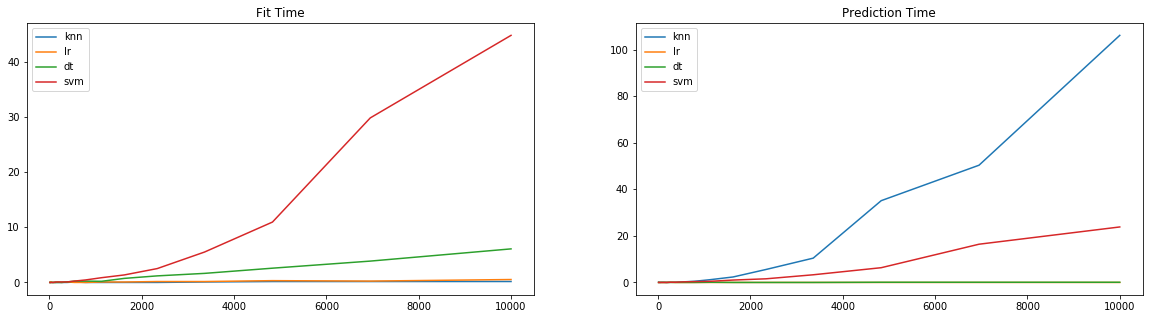

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
for model_name in results_df.model_name.unique():
    model_results_df = results_df[results_df.model_name == model_name]

    ax1.set_title('Fit Time')
    ax1.plot(model_results_df.n, model_results_df.fit_time, label=model_name)
    ax1.legend()
    
    ax2.set_title('Prediction Time')
    ax2.plot(model_results_df.n, model_results_df.predict_time, label=model_name)
    ax2.legend()

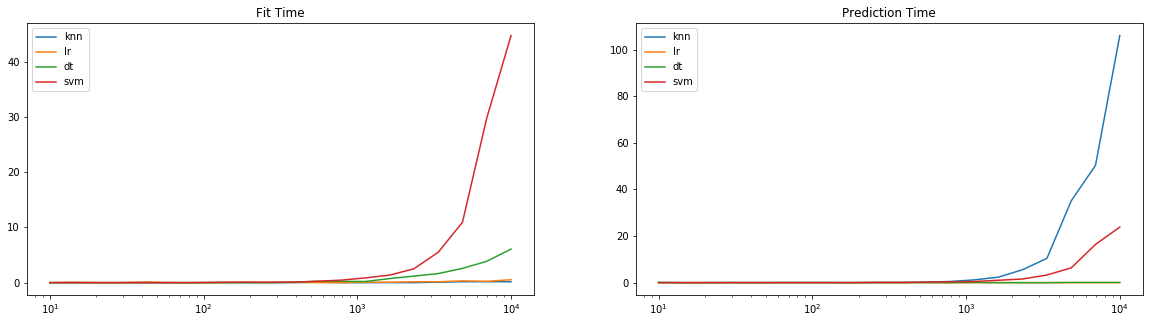

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
for model_name in results_df.model_name.unique():
    model_results_df = results_df[results_df.model_name == model_name]

    ax1.set_title('Fit Time')
    ax1.plot(model_results_df.n, model_results_df.fit_time, label=model_name)
    ax1.set_xscale('log')
    ax1.legend()
    
    ax2.set_title('Prediction Time')
    ax2.plot(model_results_df.n, model_results_df.predict_time, label=model_name)
    ax2.set_xscale('log')
    ax2.legend()